In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
color_raw = o3d.io.read_image("./images/realsense2.jpg")

In [3]:
color_raw

Image of size 1280x720, with 3 channels.
Use numpy.asarray to access buffer data.

In [4]:
depth_raw = o3d.io.read_image("./images/realsense2_depth_colored.png")

In [5]:
depth_raw

Image of size 1280x720, with 3 channels.
Use numpy.asarray to access buffer data.

In [6]:
rgdb_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw
)
rgdb_image

RGBDImage of size 
Color image : 1280x720, with 1 channels.
Depth image : 1280x720, with 1 channels.
Use numpy.asarray to access buffer data.

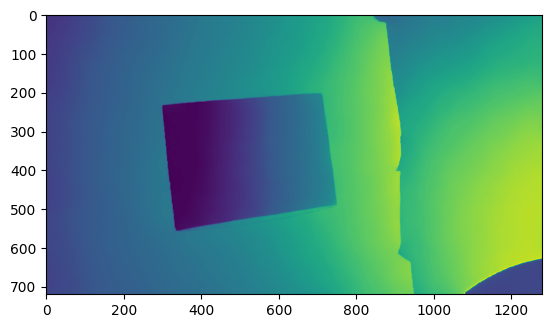

In [7]:
plt.imshow(rgdb_image.depth)

In [8]:
camera_intrinsic = o3d.camera.PinholeCameraIntrinsic(o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault)

In [9]:
camera_intrinsic

PinholeCameraIntrinsic with width = 640 and height = 480.
Access intrinsics with intrinsic_matrix.

In [10]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgdb_image, camera_intrinsic)
    
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [11]:
# Create a PinholeCameraIntrinsic object
intrinsic = o3d.camera.PinholeCameraIntrinsic()

# Set the parameters
intrinsic.set_intrinsics(
    width=848, 
    height=480, 
    fx=428.453, 
    fy=428.453, 
    cx=427.148, 
    cy=239.639
)

print(intrinsic)

PinholeCameraIntrinsic with width = 848 and height = 480.
Access intrinsics with intrinsic_matrix.


In [12]:
# Create the point cloud from images and camera intrisic parameters
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(rgdb_image, intrinsic)
    
# Flip it, otherwise the pointcloud will be upside down
# pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])